In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
import re

In [77]:
df = pd.read_excel('/Users/shenglanli/device_price/scraper_result.xlsx')

In [78]:
df.drop(['Unnamed: 27', 'Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31',
        'Unnamed: 32','Unnamed: 33','Unnamed: 34','Unnamed: 35','Unnamed: 36',
        'Unnamed: 37','Unnamed: 38'], axis=1, inplace = True)

In [79]:
df.isnull().sum()

Title                     0
Price                    30
Condition                45
Connectivity           3321
Model                  1117
Network                2606
Screen Size            2983
Lock Status            3941
RAM                    4353
Manufacturer Color     9023
Capacity              10062
Contract               4816
Model Number           5312
Chipset Model          7884
Seller Notes           5860
Brand                   843
Storage Capacity       1775
Camera Resolution      3522
Operating_System       3340
Processor              4503
Features               4508
Release Date          10065
Style                  4232
Type                   5644
SIM                    4804
MPN                    3879
Cellular Band          8379
dtype: int64

In [80]:
df.drop(['Cellular Band','Release Date','Capacity','Manufacturer Color'],axis=1,inplace = True)
df.drop(['Features','Style','Type','SIM','MPN','Processor'],axis=1,inplace = True)
df.drop(columns='Chipset Model',axis = 1,inplace = True)
df.drop(['Seller Notes'],axis=1,inplace = True)

In [81]:
df['Price']= df['Price'].str.replace(',','')

In [82]:
df

,Title,Price,Condition,Connectivity,Model,Network,Screen Size,Lock Status,RAM,Contract,Model Number,Brand,Storage Capacity,Camera Resolution,Operating_System
0,Samsung Galaxy A71 5G SM-A716U 128GB+6GB 64MP ...,GBP 165.00,"New: A brand-new, unused, unopened, undamaged ...","2G, 3G, 4G, 5G, Bluetooth, GPS, LTE, NFC, Quad...",Samsung Galaxy A71 5G,Unlocked,6.7 in,Factory Unlocked,6 GB,Without Contract,SM-A716U,Samsung,128 GB,64.0 MP,Android
1,CUBOT P80 Smartphone 16+256GB Unlock Android13...,GBP 149.99,"New: A brand-new, unused, unopened, undamaged ...","4G,Bluetooth,NFC",P80,"GSM,WCDMA,FDD,TDD",6.58INCH,Network Unlocked,16 GB,Without Contract,P80,CUBOT,256GB,48MP,Android 13
2,Cubot 6GB+128GB P60 Smartphone Octa-Core Andro...,GBP 119.99,"New: A brand-new, unused, unopened, undamaged ...",4G,P60,"GSM,WCDMA,FDD",6.5INCH,Factory Unlocked,6GB,Without Contract,P60,cubot,128GB,20MP,Android
3,Samsung Galaxy A51 SM-A515U (USA) 128GB+4GB 48...,US $170.00,"New: A brand-new, unused, unopened, undamaged ...","2G, 3G, 4G, Bluetooth, GPS, LTE, NFC, Quad-Ban...",Samsung Galaxy A51,Unlocked,6.5 in,Factory Unlocked,4 GB,Without Contract,SM-A515U,Samsung,128 GB,48.0 MP,Android
4,New Sealed Samsung Galaxy A14 Smartphone 64GB ...,GBP 112.80,"New: A brand-new, unused, unopened, undamaged ...",4G,Samsung Galaxy A14,Unlocked,6.6 in,Factory Unlocked,4 GB,Without Contract,NaN,Samsung,64 GB,"Triple 50 MP, f/1.8, (wide), PDAF",Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10106,Nokia 6030 / 6030b - Black ( AT&T / Cingular )...,US $13.49,UsedAn item that has been used previously. The...,NaN,6030b,AT&T,NaN,NaN,NaN,NaN,NaN,Nokia,2 GB,NaN,NaN
10107,HTC EVO Design PH44100 black smartphone parts ...,US $8.19,For parts or not working: An item that does no...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTC,NaN,NaN,NaN
10108,668.Ericsson EH237 Very Rare - For Collectors ...,US $49.99,Used: An item that has been used previously. T...,Micro USB,EH237,Unlocked,2.5 in,Network Locked,NaN,NaN,NaN,Ericsson,512 MB,2.0 MP,NaN
10109,Samsung Galaxy S20 Ultra 5G G988U 128GB Factor...,US $256.50,UsedAn item that has been used previously. The...,"2G, 3G, 4G, 4G+, 5G, Bluetooth, GPS, Wi-Fi",Samsung Galaxy S20 Ultra 5G,Unlocked,6.9 in,Factory Unlocked,12 GB,Without Contract,G988U,Samsung,128 GB,NaN,Android 10


In [83]:
df[df['Price'].str.contains('C', na=False)]

,Title,Price,Condition,Connectivity,Model,Network,Screen Size,Lock Status,RAM,Contract,Model Number,Brand,Storage Capacity,Camera Resolution,Operating_System
673,6.8 Unlocked i13 Pro Max Android 10 Smartphone...,C $79.99,"New: A brand-new, unused, unopened, undamaged ...",NaN,i13 Pro Max,NaN,NaN,NaN,4 GB,NaN,NaN,Unbranded,4 GB+64GB,NaN,NaN
802,iPhone 15 Pro Max UNLOCKED Physical SIM Tray 2...,C $2449.00,"New: A brand-new, unused, unopened, undamaged ...","USB Type-C, 5G, Bluetooth, Wi-Fi, NFC",Apple iPhone 15 Pro Max,Unlocked,6.7 in,Factory Unlocked,8 GB,Without Contract,NaN,Apple,128 GB,48.0 MP,iOS
825,Apple iPhone 14 Pro Max ✅ WITH PHYSICAL SIM SL...,C $2100.00,"New: A brand-new, unused, unopened, undamaged ...",5G,Apple iPhone 14 Pro Max,Unlocked,6.7,Factory Unlocked,6 GB,Without Contract,NaN,Apple,"128GB, 256GB, 512GB, 1TB",48.0 MP,iOS
1031,iPhone 15 Pro - Physical SIM Tray - 128GB 256G...,C $1949.00,"New: A brand-new, unused, unopened, undamaged ...","USB Type-C, 5G, Bluetooth, Wi-Fi, NFC",Apple iPhone 15 Pro,Unlocked,6.1 in,Factory Unlocked,8 GB,Without Contract,A3101,Apple,128 GB,48.0 MP,iOS
1493,iPhone 15 Pro - Physical SIM Tray - 128GB 256G...,C $1850.00,"New: A brand-new, unused, unopened, undamaged ...","USB Type-C, 5G, Bluetooth, Wi-Fi, NFC",Apple iPhone 15 Pro,Unlocked,6.1 in,Factory Unlocked,8 GB,Without Contract,A3101,Apple,128 GB,48.0 MP,iOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9776,6GB+128GB 10.1 inch 1960*1080 High-Clear Andro...,C $113.87,"New: A brand-new, unused, unopened, undamaged ...",NaN,Does not Apply,NaN,NaN,NaN,NaN,NaN,NaN,Unbranded/Generic,Does not Apply,NaN,NaN
9874,Used - Google Pixel Fold - 256GB,C $999.00,Used: An item that has been used previously. T...,NaN,Google Pixel,Unlocked,NaN,Factory Unlocked,NaN,NaN,NaN,Google,256 GB,NaN,NaN
9947,Hitachi Cellphone-,C $7.00,UsedAn item that has been used previously. The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10028,~ HTC Desire 601 - 8GB White 4.5 Android Smart...,C $37.05,UsedAn item that has been used previously. The...,NaN,HTC Desire 601,Fido,4.5 in,NaN,NaN,NaN,NaN,HTC,8 GB,NaN,Android


In [84]:
df.loc[df['Price'].str.contains('GBP', na=False),'Price']=df[df['Price'].str.contains('GBP', na=False)]['Price'].str.replace('GBP','').apply(pd.to_numeric).apply(lambda x: x*1.22)

In [85]:
df.loc[df['Price'].str.contains('US', na=False),'Price']=df[df['Price'].str.contains('US', na=False)]['Price'].str.replace('US','').str.replace('$','').str.replace('/ea','').apply(pd.to_numeric)

In [86]:
df.loc[df['Price'].str.contains('AU', na=False),'Price']=df[df['Price'].str.contains('AU', na=False)]['Price'].str.replace('AU','').str.replace('$','').str.replace('/ea','').apply(pd.to_numeric).apply(lambda x: x*0.64)

In [87]:
df[df['Price'] =='Planet Computers']

,Title,Price,Condition,Connectivity,Model,Network,Screen Size,Lock Status,RAM,Contract,Model Number,Brand,Storage Capacity,Camera Resolution,Operating_System
8230,"Main body only.”""",Planet Computers,128 GB,24.0 MP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
df.drop(labels=8230, axis=0,inplace=True)

In [89]:
df[df['Price'].str.contains('SD', na=False)]

,Title,Price,Condition,Connectivity,Model,Network,Screen Size,Lock Status,RAM,Contract,Model Number,Brand,Storage Capacity,Camera Resolution,Operating_System
9766,Manual,SD Card,SIM Card,Charger,Data Cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
df.drop(labels=9766, axis=0,inplace=True)

In [91]:
df.loc[df['Price'].str.contains('C', na=False),'Price']=df[df['Price'].str.contains('C', na=False)]['Price'].str.replace('C','').str.replace('$','').str.replace('/ea','').apply(pd.to_numeric).apply(lambda x: x*0.72)

In [92]:
df.loc[df['Price'].str.contains('EUR', na=False),'Price']=df[df['Price'].str.contains('EUR', na=False)]['Price'].str.replace('EUR','').str.replace('/ea','').apply(pd.to_numeric).apply(lambda x: x*1.06)

In [93]:
df[df['Price'].str.contains('devices', na=False)]

,Title,Price,Condition,Connectivity,Model,Network,Screen Size,Lock Status,RAM,Contract,Model Number,Brand,Storage Capacity,Camera Resolution,Operating_System
243,The device is in flawless/mint cosmetic condition,some devices may have very light sign of wear...,Samsung,32 GB,5.0 MP,Android,Octa Core,"4K Video Recording, Accelerometer, Active Edge...",NaN,Single SIM,A20 A205U,NaN,NaN,NaN,NaN


In [94]:
df.drop(labels=243, axis=0,inplace=True)

In [95]:
df['Price'] = df.apply(lambda r: r['Price'] if type(r['Price'])==float else np.nan, axis=1)

In [96]:
df.isna().sum()

Title                   0
Price                  60
Condition              45
Connectivity         3321
Model                1116
Network              2604
Screen Size          2981
Lock Status          3939
RAM                  4350
Contract             4814
Model Number         5310
Brand                 840
Storage Capacity     1772
Camera Resolution    3519
Operating_System     3337
dtype: int64

In [97]:
#df.loc[df['Network'].str.contains('Unlocked', na=False),'Network']= 0

In [98]:
#df.loc[df['Network'] != 0, 'Network'] =1

In [99]:
#df.loc[df['Screen Size'].str.contains('in', na=False),'Screen Size']
#df.loc[df['Screen Size'].str.contains('IN', na=False)]
df['Screen Size'] = df['Screen Size'].str.extract(r'(\d+\.?\d*)').astype(float)

In [100]:
df['Lock Status'].unique()

array(['Factory Unlocked', 'Network Unlocked', nan, 'No', 'Unlocked',
       'Network Locked', '3GB', 'UNLOCKED', 'GSM Unlocked', '2GB / 3GB',
       'Fully Unlocked', 'GSM Factory Unlocked', 'AT&T Unlocked',
       'Factory UNlocked', '8GB',
       'Network Unlocked By Code or Remote Technician', '6GB',
       'GSM UNLOCKED', '6 GB', 'Unknown', '12 MB',
       'T-mobile, MetroPCS or Unlocked', '8 GB',
       'Network Locked/Factory Unlocked', '2 GB', '128MB', '256M', '1GB',
       'Does Not Apply', '1.5GB', 'NO', 'SH-06G', 'Network Unlocked"',
       'Free from factory', '448MB', ' gold', 'untested',
       'Black, white, green, orange', '16 GB', '1 GB', 'unknown',
       'Network / SIM Unlocked',
       'Network Locked/Network Unlocked/Factory Unlocked', 'Orange',
       'Dose Not Apply', 'Unsure', '4 MB', 'SIM FREE', 'Does not apply',
       'Apple iPhone 14 Pro Max', 'Samsung Galaxy Core Prime', 'unlocked',
       'does not apply', 'For iphone 14 Pro Max', 'N/a', 'Blue',
       'Ré

In [101]:
keywords = ['locked', 'unlocked', 'free', 'unknown']

# Function to check if any keyword is in the value
def check_keywords(value):
    if pd.isna(value):
        return value
    if any(keyword.lower() in str(value).lower() for keyword in keywords):
        return value
    return 'unknown'

# Apply the function to the 'Lock Status' column
df['Lock Status'] = df['Lock Status'].apply(check_keywords)

In [102]:
def replace_values(value):
    if 'unlocked' in str(value).lower() or 'free' in str(value).lower():
        return 'unlocked'
    elif 'locked' in str(value).lower():
        return 'locked'
    elif 'unknown' in str(value).lower():
        return 'unknown'
    elif pd.isna(value):
        return value
    else:
        return 'unknown'  # Default case, should not occur as all values are already filtered

# Apply the function to the 'Lock Status' column
df['Lock Status'] = df['Lock Status'].apply(replace_values)

df['Lock Status'] 

0        unlocked
1        unlocked
2        unlocked
3        unlocked
4        unlocked
           ...   
10106         NaN
10107         NaN
10108      locked
10109    unlocked
10110    unlocked
Name: Lock Status, Length: 10108, dtype: object

In [103]:
df['Lock Status'].unique()

array(['unlocked', nan, 'unknown', 'locked'], dtype=object)

In [104]:
df['Network'].unique()

array(['Unlocked', 'GSM,WCDMA,FDD,TDD', 'GSM,WCDMA,FDD', '2G/3G/4G', nan,
       'all',
       '5G: n1/n3/n5/n8/n28A/n38/n41/n77/n78, 4G: FDD-LTE: B1/B3/B5/B8/B19, 4G: TDD-LTE: B34/B38/B39/B40/B41 Note: LTE B41 (2496-2690 194MHz), 3G: WCDMA: B1/B5/B6/B8/B19; CDMA EVDO: BC0, 2G: GSM: B3/B5/B8; CDMA 1X: BC0',
       'GSM,WCDMA,FDD,TDD,CDMA',
       '4G:FDD-LTE:B1/2/3/4/5/7/8/12/13/17, 4G:FDD-LTE:B18/19/20/25/26/28A+B/66, 4G:TDD:38/39/40/41, 3G:WCDMA: B1/2/4/5/6/8/19, 2G:GSM: 850/900/1800/1900MHz',
       '5G:SA: n1/n5/n8/n41/n28A/n78, NSA: n41/n78, 4G:FDD-LTE: B1/B3/B5/B8, 4G:TDD-LTE: B34/B38/B39/B40/B41, 3G:WCDMA: B1/B5/B8, 2G:GSM: B3/B5/B8; CDMA 1X: BC0',
       'EE, Unlocked',
       'GSM (Band 2/3/5/8), WCDMA (Band 1/2/4/5/6/8), TDSCDMA (Band 34/39), LTE-FDD (Band 1/2/3/4/5/7/8/12/13/17), LTE-FDD (Band 18/19/20/25/26/28A/28B/66), LTE-TDD (Band 34/38/39/40/41), CDMA2000 (Band BC0/BC1), Wi-Fi: WLAN 802.11 a/b/g/n/ac 2.4GHz/5GHz',
       'Vodafone',
       '4G FDD-LTE: B1/2/3/4/5/7/8/12

In [105]:
def replace_values_net(value):
    if 'unlocked' in str(value).lower() or 'free' in str(value).lower():
        return 'unlocked'
    elif 'all' in str(value).lower():
        return 'unlocked'
    elif 'applicable' in str(value).lower() or 'free' in str(value).lower():
        return 'unknown'
    elif pd.isna(value):
        return value
    else:
        return 'restricted'
df['Network'] = df['Network'].apply(replace_values_net)

In [106]:
df['Network'].unique()

array(['unlocked', 'restricted', nan, 'unknown'], dtype=object)

In [107]:
df.loc[df['Condition'].str.contains('refurbished', na=False)]

,Title,Price,Condition,Connectivity,Model,Network,Screen Size,Lock Status,RAM,Contract,Model Number,Brand,Storage Capacity,Camera Resolution,Operating_System
17,"Apple iPhone 11 Unlocked, 64GB/128GB/256GB, Al...",268.3878,Good - RefurbishedThe item shows moderate wear...,4G,iPhone 11,unlocked,6.1,NaN,4GB,Without Contract,"A2111, A2223, A2221",Apple,NaN,12MP,iOS
25,Apple iPhone 12 Pro 128GB Unlocked All Colours...,468.4800,Very Good - RefurbishedThe item shows minimal ...,"5G, 4G, Bluetooth, GPRS, GPS, Tri-Band",Apple iPhone 12 Pro,unlocked,6.1,unlocked,4 GB,Without Contract,Apple iPhone 12 Pro,Apple,NaN,12.0 MP,iOS
27,"Apple iPhone 12 Unlocked, 64GB/128GB/256GB, Al...",341.5878,Good - RefurbishedThe item shows moderate wear...,5G,iPhone 12,unlocked,6.1,NaN,4GB,Without Contract,"A2403, A2172, A2402, A2404",Apple,NaN,12MP,iOS
34,Apple iPhone SE (2020) 2nd Gen 64GB 128GB 256G...,157.3800,Excellent - RefurbishedThe item is in like-new...,"3G, 4G, Bluetooth, GPRS, GPS, Tri-Band",Apple iPhone SE (2nd Generation),unlocked,4.7,unlocked,3 GB,Without Contract,Apple iPhone SE (2nd Generation),APPLE,NaN,NaN,iOS
39,Samsung Galaxy J5 Pro Smart Phone 16GB Dual SI...,73.1878,Very Good - RefurbishedThe item shows minimal ...,"2G, 3G, 4G, Bluetooth, Dual-Band, GPRS, GPS, L...",Samsung Galaxy J5 Pro,NaN,5.2,unlocked,2 GB,NaN,J530F/DS,Samsung,16 GB,13.0 MP,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9822,Apple iPhone XS (A1920) 64GB Silver (AT&T) Goo...,202.9900,Good - RefurbishedThe item shows moderate wear...,"Bluetooth, 4G, Wi-Fi, Lightning, NFC",Apple iPhone XS,restricted,5.8,locked,4GB,Without Contract,A1920,Apple,64 GB,12.0 MP,iOS
9857,Apple iPhone 11 Pro (A2160) 64GB Midnight Gree...,330.9900,Good - RefurbishedThe item shows moderate wear...,"Bluetooth, 4G, Wi-Fi, Lightning, NFC",Apple iPhone 11 Pro,restricted,5.8,locked,4 GB,Without Contract,A2160 (CDMA + GSM),Apple,64 GB,12.0 MP,iOS
9898,Apple iPhone 11 64GB PRODUCT Red Unlocked Very...,301.9900,Very Good - RefurbishedThe item shows minimal ...,"Bluetooth, 4G, Wi-Fi, Lightning, NFC",Apple iPhone 11,unlocked,6.1,unlocked,NaN,NaN,A2111 (CDMA + GSM),Apple,64 GB,12.0 MP,iOS
9976,Samsung Galaxy S8 Plus G955U G955 Unlocked T-M...,109.9800,Very Good - RefurbishedThe item shows minimal ...,"2G, 3G, 4G, Bluetooth, LTE, Wi-Fi",Samsung Galaxy S8+,NaN,5.8,unknown,Black Gray Silver,"G955U, SM-G955U, SM-G955U1",NaN,64GB,12.0MP,Android,Octa Core


In [108]:
df.loc[df['Condition'].str.contains('original box', na=False)]

,Title,Price,Condition,Connectivity,Model,Network,Screen Size,Lock Status,RAM,Contract,Model Number,Brand,Storage Capacity,Camera Resolution,Operating_System
467,Item condition：These phones are fully function...,NaN,"original box with accessories and SIM card.” """,Samsung,64 GB,NaN,NaN,NaN,"4K Video Recording, Accelerometer, Active Edge...",NaN,Single SIM,NaN,NaN,NaN,NaN
3530,Touch screen gloves One size fits all 10 finge...,5.4778,"New with tags: A brand-new, unused, and unworn...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ghi,NaN,NaN,NaN
5676,Item condition：These phones are fully function...,NaN,original box with accessories and SIM card.Op...,used phone,not new phone,restricted,9.5,unknown,without original box and original accessories,NaN,NaN,Samsung,64GB,12.0MP,Android
5869,Item condition：These phones are fully function...,NaN,original box with accessories and SIM card.Op...,used phone,not new phone,restricted,9.5,NaN,NaN,NaN,100% functional,Samsung,64 GB,12.0 MP,Android
6134,Item condition：These phones are fully function...,NaN,original box with accessories and SIM card.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6364,Item condition：These phones are fully function...,NaN,original box with accessories and SIM card.Ea...,T-Mobile,Metro PC,restricted,NaN,unknown,NaN,9.5/10 with minor scratches,100% functional,Samsung,64 GB,12.0 MP,Android
6616,Item condition：These phones are fully function...,NaN,original box with accessories and SIM card.Op...,used phone,not new phone,restricted,9.5,unknown,without original box and original accessories,128 GB,64MP,"4K Video Recording, Accelerometer, Active Edge...",NaN,Smartphone,NaN
7330,Item condition：These phones are fully function...,NaN,original box with accessories and SIM card.Op...,used phone,not new phone,restricted,9.5,unknown,without original box and original accessories,64 GB,12.0 MP,"4K Video Recording, Accelerometer, Active Edge...",NaN,Bar,MicroSD
7339,Item condition：These phones are fully function...,NaN,original box with accessories and SIM card.Sa...,check our ratings to see what our customers h...,don't hesitate to send us a message! We're ha...,NaN,NaN,NaN,NaN,NaN,NaN,Samsung,64 GB,12.0 MP,Android
9801,Multi-Function Mobile Phone UV Sterilizer Box ...,19.9000,"New with box: A brand-new, unused, and unworn ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unbranded,NaN,NaN,NaN


In [109]:
def replace_values_con(value):
    if 'brand-new' in str(value).lower():
        return 'brand-new'
    else: return value
df['Condition'] = df['Condition'].apply(replace_values_con)

In [110]:
def replace_values_con(value):
    if 'refurbished' in str(value).lower():
        return 'refurbished'
    else: return value
df['Condition'] = df['Condition'].apply(replace_values_con)

In [111]:
def replace_values_con(value):
    if 'used' in str(value).lower():
        return 'used'
    else: return value
df['Condition'] = df['Condition'].apply(replace_values_con)

In [112]:
def replace_values_con(value):
    if 'function' in str(value).lower():
        return 'parts or not working'
    else: return value
df['Condition'] = df['Condition'].apply(replace_values_con)

In [113]:
def replace_values_con(value):
    if 'excellent' in str(value).lower():
        return 'open box_excellent'
    else: return value
df['Condition'] = df['Condition'].apply(replace_values_con)

In [114]:
def replace_values_con(value):
    if 'original box' in str(value).lower():
        return 'original box'
    else: return value
df['Condition'] = df['Condition'].apply(replace_values_con)

In [115]:
key = ['brand-new', 'open box_excellent', 'refurbished', 'used',
       'parts or not working', 'original box']
def check_keywords_con(value):
    if pd.isna(value):
        return value
    if any(keyword.lower() in str(value).lower() for keyword in key):
        return value
    return 'unknown'

# Apply the function to the 'Lock Status' column
df['Condition'] = df['Condition'].apply(check_keywords_con)

In [116]:
df['Condition'].unique()

array(['brand-new', 'open box_excellent', 'refurbished', 'used',
       'parts or not working', 'original box', 'unknown', nan],
      dtype=object)

In [117]:
df['RAM'].unique()

array(['6 GB', '16 GB', '6GB', '4 GB', '2GB',
       '16GB 2GB RAM, 32GB 2GB RAM, 64GB 2GB RAM, 128GB 2', nan, '3GB',
       'No', '12 GB / 16 GB', '24GB(12GB+12GB Extended)', '16GB', '4GB',
       '3 GB', '12 GB', '2 GB', '1.5', '8GB / 12 GB / 16 GB', '8 GB',
       '2GB RAM', '278 MB', '1.5 GB', '512 MB', '12GB +12GB virtual RAM',
       '1 GB', 'A24 4G / 4GB Ram - A34 5G/ 6 GB Ram - A54 5G / 6GB Ram',
       '512MB', '3GB / 4GB', 'Not Specified', '3/4GB RAM', '4GB / 6GB',
       '4GB & 6GB', 'vary', '3', '1GB', '4GB/6GB', '12GB', 'See color',
       '12GB/16GB/24GB', '32MB', 'Black, Blue, Gray', '3 GB RAM', '48 MB',
       '256MB', '4 GB / 6 GB', '4GB RAM', '24 GB',
       '4K Video Recording, Accelerometer, Active Edge, Ambient Light Sensor, AMOLED Display, Barometer, Bluetooth Enabled, Camera, Color Screen, E-compass, Email, Web, Email Access, Facial Recognition, Fast Charging, Fast Wireless Charging, GPS, Gyro Sensor, Live Focus, Music Player, NFC Connectivity, Proximity Sensor, 

In [118]:
df['RAM'].isna().sum()

4350

In [119]:
def process_ram_v2(value):
    if not any(char.isdigit() for char in str(value)):
        return 'unknown'

    # Extract numeric part of the value
    numeric_part = ''.join(filter(str.isdigit, str(value)))

    # Check for GB or Go in the value and return the numeric part only
    if 'gb' in str(value).lower() or 'go' in str(value).lower():
        return numeric_part
    
    # Check for MB in the value and convert to GB
    elif 'mb' in str(value).lower():
        return str(float(numeric_part) * 0.001) if numeric_part.isdigit() else 'unknown'

    # If value is just a number
    elif numeric_part.isdigit():
        return numeric_part
    
    elif pd.isna(value):
        return value

    # Default case
    return 'unknown'

# Apply the revised function to the 'RAM' column
df['RAM'] = df['RAM'].apply(process_ram_v2)

In [120]:
df['RAM'] = df['RAM'].replace('1623226421282', '16')

In [121]:
df['RAM'] = df['RAM'].replace('1216', '12')
df['RAM'] = df['RAM'].replace('241212', '24')
df['RAM'] = df['RAM'].replace('81216', '8')
df['RAM'] = df['RAM'].replace('244434565456', '24')
df['RAM'] = df['RAM'].replace('121624', '12')
df['RAM'] = df['RAM'].replace('812', '8')
df['RAM'] = df['RAM'].replace('81012', '8')
df['RAM'] = df['RAM'].replace('1266', '12')
df['RAM'] = df['RAM'].replace('6812', '6')
df['RAM'] = df['RAM'].replace('20128', '20')
df['RAM'] = df['RAM'].replace('332464', '32')
df['RAM'] = df['RAM'].replace('221210', '22')
df['RAM'] = df['RAM'].replace('1688', '88')
df['RAM'] = df['RAM'].replace('1212', '12')

In [122]:
df['RAM'].unique()

array(['6', '16', '4', '2', 'unknown', '3', '12', '24', '15', '8',
       '0.278', '0.512', '1', '34', '46', '0.032', '0.048', '0.256',
       '0.004', '0.005', '0.128', '0.008', '0.012', '0.064', '161', '05',
       '19', '68', '0.016', '0.06', '32', '0.258', '005', '5', '0.768',
       '23', '128', '0.384', '0.058', '0.448', '0.192', '512', '0.14',
       '0.001', '0.078', '14', '644', '35', '1210', '0.05', '0.25', '20',
       '125', '0.01', '003', '42', '0.02', '0.47800000000000004', '22',
       '0.015', '64', '0.002', '200', '256', '0.045', '44', '18', '88',
       '0.5', '0.515', '048', '7', '0.006', '0.052000000000000005'],
      dtype=object)

In [123]:
def replace_values_cont(value):
    if 'without' in str(value).lower():
        return 'Without Contract'
    else: return value
df['Contract'] = df['Contract'].apply(replace_values_cont)

In [124]:
def replace_values_cont(value):
    if 'no' in str(value).lower():
        return 'Without Contract'
    else: return value
df['Contract'] = df['Contract'].apply(replace_values_cont)

In [125]:
def replace_values_cont(value):
    if 'unlocked' in str(value).lower()or'free' in str(value).lower():
        return 'Without Contract'
    else: return value
df['Contract'] = df['Contract'].apply(replace_values_cont)

In [126]:
def replace_values_cont(value):
    if 'order' in str(value).lower()or 'functional' in str(value).lower():
        return 'Without Contract'
    else: return value
df['Contract'] = df['Contract'].apply(replace_values_cont)

In [127]:
def replace_values_cont(value):
    if 'prepaid' in str(value).lower():
        return 'Prepaid'
    else: return value
df['Contract'] = df['Contract'].apply(replace_values_cont)

In [128]:
def replace_values_cont(value):
    if 'pay' in str(value).lower():
        return 'Pay as go'
    else: return value
df['Contract'] = df['Contract'].apply(replace_values_cont)

In [129]:
def replace_values_cont(value):
    if 'zonder' in str(value).lower():
        return 'With Contract'
    else: return value
df['Contract'] = df['Contract'].apply(replace_values_cont)

In [130]:
df['Contract'] = df['Contract'].replace('Contract', 'With Contract')

In [131]:
key = ['Postpaid','With Contract','Pay as go','Prepaid','Without Contract']
def check_keywords_cont(value):
    if pd.isna(value):
        return value
    if any(keyword.lower() in str(value).lower() for keyword in key):
        return value
    return 'unknown'

# Apply the function to the 'Lock Status' column
df['Contract'] = df['Contract'].apply(check_keywords_cont)

In [132]:
df['Contract'].unique() 

array(['Without Contract', nan, 'unknown', 'Prepaid', 'With Contract',
       'Pay as go', 'Postpaid'], dtype=object)

In [133]:
df['Brand'].unique()

array(['Samsung', 'CUBOT', 'cubot', 'Apple', 'Unbranded', 'BlackBerry',
       'Xiaomi', 'Cubot', 'Motorola', 'emporia', 'Redmi',
       'Does not apply', 'APPLE', 'Vodafone', 'HTC', 'Kyocera', 'Infinix',
       'CAT', nan, 'Huawei', 'InFocus', 'OPPO', 'XGODY', 'Ulefone', 'LG',
       'Unknown', 'Microsoft', 'SAMSUNG', 'Fujitsu', 'Sony', 'Sharp',
       'Nokia', 'ASUS', 'Google', 'Sony Ericsson', 'OnePlus', 'S&M',
       'REALME', 'QIN', 'TCL', 'realme', 'Alcatel', 'XIAOMI', 'UMIDIGI',
       'WingTech', 'T-Mobile', 'Maxwest', 'NUU', 'Sonim', 'Sky Devices',
       'Wingtech', 'Vortex', 'UMX', 'Schok', 'GOOGLE',
       'Samsung Electronics', 'Ultra', 'NOKIA', 'Aspera', 'Royole',
       'BENTOBEN', '16GB', 'Unihertz', 'TTfone', 'AIEK', 'Oppo', '8GB',
       'Oneplus', 'VIVO', 'Ericsson', 'Kyocera Torque', 'OUKITEL',
       'Nubia', 'HRTECH', 'Rooted Android', 'Palm', 'Honor', 'Zanco',
       'Lumigon', 'DOOGEE', 'Blackview', 'PROMax', 'Unbranded/Generic',
       'Digital Tec', 'Doro', 's

In [134]:
key = ['Samsung','CUBOT','Apple','BlackBerry','Unbranded','Xiaomi','Motorola','Redmi','Vodafone','HTC',\
       'Infinix','Huawei','OPPO','LG','Microsoft','Sony','Nokia','ASUS','Google','OnePlus']
def check_keywords_br(value):
    if pd.isna(value):
        return value
    if any(keyword.lower() in str(value).lower() for keyword in key):
        return value.lower()
    return value

# Apply the function to the 'Lock Status' column
df['Brand'] = df['Brand'].apply(check_keywords_br)

In [135]:
def replace_values_net(value):
    if 'samsung' in str(value).lower():
        return 'samsung'
    elif 'cubot' in str(value).lower():
        return 'cubot'
    elif 'apple' in str(value).lower():
        return 'apple'
    elif 'blackberry' in str(value).lower():
        return 'apple'
    elif 'xiaomi' in str(value).lower():
        return 'xiaomi'
    elif 'motorola' in str(value).lower():
        return 'motorola'
    elif 'vodafone' in str(value).lower():
        return 'vodafone'
    elif 'huawei' in str(value).lower():
        return 'huawei'
    elif 'microsoft' in str(value).lower():
        return 'microsoft'
    elif 'sony' in str(value).lower():
        return 'sony'
    elif 'google' in str(value).lower():
        return 'google'
    elif 'nokia' in str(value).lower():
        return 'nokia'
    elif 'asus' in str(value).lower():
        return 'asus'
    elif 'no' in str(value).lower() or 'unknown' in str(value).lower():
        return 'unknown'
    elif pd.isna(value):
        return value
    else:
        return 'other'
df['Brand'] = df['Brand'].apply(replace_values_net)

In [140]:
df['Storage Capacity'].unique()

array(['128', '256', '64', '32', '464', '163', 'unknown', '0.512', '641',
       '16', '8', '12', '162', '0.158', '4', '0.01', '0.001', '512',
       '0.064', '0.004', '9', '1', '0.005', '0.128', '642', '2', '15',
       '0.028', '0.055', '0.17', '80', '320', '0.032', '0.006', '0.008',
       '0.044', '0.16', '6.464', '0.012', '0.03', '0.016', '0.04',
       '0.002', '161', '0.048', '0.06', '0.02', '51', '0.28', '20',
       '0.043000000000000003', '326', '0.108', '0.046', '0.011', '321',
       '0.256', '0.078', '0.042', '0.12', '50', '0.232', '0.54', '0.18',
       '006', '0.4', '0.22', '0.05', '0.384', '0.15', '240', '0', '0.045',
       '816', '0.11', '120', '10', '0.009000000000000001', '0.003',
       '0.448', '0.26', '0.022', '13', '0.23', '0.013000000000000001',
       '186', '0.42', '70', '0.28800000000000003', '0.5',
       '0.11800000000000001', '0.015', '0.14', '5.003', '11', '0.007',
       '0.034', '0.1', '0.017', '14', '0.08', '0.038', '0.075', '0.019',
       '0.014', '

In [136]:
def process_str_v2(value):
    if not any(char.isdigit() for char in str(value)):
        return 'unknown'

    # Extract numeric part of the value
    numeric_part = ''.join(filter(str.isdigit, str(value)))

    # Check for GB or Go in the value and return the numeric part only
    if 'gb' in str(value).lower() or 'go' in str(value).lower():
        return numeric_part
    
    # Check for MB in the value and convert to GB
    elif 'mb' in str(value).lower():
        return str(float(numeric_part) * 0.001) if numeric_part.isdigit() else 'unknown'

    # If value is just a number
    elif numeric_part.isdigit():
        return numeric_part
    
    elif pd.isna(value):
        return value

    # Default case
    return 'unknown'

# Apply the revised function to the 'RAM' column
df['Storage Capacity'] = df['Storage Capacity'].apply(process_str_v2)

In [139]:
def process_storage(value):
    if value == 'unknown':
        return value
    if len(value) ==4 and value.isdigit():
        return value[:2]  # Take the first two digits
    if len(value) >=5 and value.isdigit():
        return value[:3]
    return value
df['Storage Capacity'] = df['Storage Capacity'].apply(process_storage)

In [143]:
def sys_v2(value):
    if 'apple' in str(value).lower() or 'ios' in str(value).lower():
        return 'ios'
    elif 'unknown' in str(value).lower():
        return 'unknown'
    elif pd.isna(value):
        return value
    else:
        return 'android'
df['Operating_System']=df['Operating_System'].apply(sys_v2)

In [144]:
df['Operating_System'].unique()

array(['android', 'ios', nan, 'unknown'], dtype=object)

In [145]:
df['Camera Resolution'].unique()

array(['64.0 MP', '48MP', '20MP', '48.0 MP',
       'Triple 50 MP, f/1.8, (wide), PDAF', '12.0 MP', nan, '12MP',
       '13.0 MP', '200MP+8MP+2MP Rear Camera, 16MP Front Camera',
       '13.0MP', '100MP', '16.0 MP', '3.0MP', '18.0 MP',
       '100MP+5MP+0.3MP（Rear）+ 32MP（Front）', '8 MP', '16.0MP', '8.0 MP',
       'Infinix Note 30 Pro', '5.0 MP', 'iOS', '20.0 MP', '5 MP', '12 MP',
       'Rear 108MP+64MP+16MP, Front 32MP', '13 MP', '1.3 MP', '64MP',
       '64 MP', '64MP+64MP Rear Camera, 16MP Front Camera', '16 MP',
       '12.0 MP, 8.0 MP', '50.0 MP', '50.0 Megapixel', '64.0MP',
       '40.0 MP', '25.0 MP', '8.1 MP', '8MP', '50.0 MP, 2.0 MP', '2.0 MP',
       '108MP + 2MP + 2MP', '208 x 208 pixels',
       '8.0 MP, 50.0 MP, 48.0 MP, 2.0 MP', '41.0MP', '11.0 MP',
       '12.0 MP, 10.0 MP, 108.0 MP', 'No', '50MP+2MP', '0.3 MP',
       '8.0 MP, 64.0 MP', '108.0 MP', '12.8.MP', '12.0 MP, 48.0 MP',
       '3200x1440', '5.0 MP, 13.0 MP, 2.0 MP', '48MP+16MP+5MP+5MP+24MP',
       '12.0 MP, 6

In [146]:
df.isna().sum()

Title                   0
Price                  60
Condition              45
Connectivity         3321
Model                1116
Network              2604
Screen Size          3135
Lock Status          3939
RAM                     0
Contract             4814
Model Number         5310
Brand                 840
Storage Capacity        0
Camera Resolution    3519
Operating_System     3337
dtype: int64

In [ ]:
import requests
from bs4 import BeautifulSoup

def get_amazon_price(search_query):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }
    
    search_url = f"https://www.amazon.com/s?k={search_query.replace(' ', '+')}"
    response = requests.get(search_url, headers=headers)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        products = soup.find_all('div', {'data-component-type': 's-search-result'})

        for product in products:
            title = product.h2.text
            if search_query.lower() in title.lower():
                price_parent = product.find('span', 'a-price')
                if price_parent:
                    price = price_parent.find('span', 'a-offscreen').text
                    return price
    return "nan"

# Apply the function to the first few rows for demonstration
# Due to the time-consuming nature of web scraping, it's not feasible to scrape all rows in this interaction
df['Search Query'] = df['Title'].str.slice(0, 50)
df['Amazon Price'] = df['Search Query'].apply(get_amazon_price)

# Save the results to an Excel file
output_excel_path = '/Users/shenglanli/device_price/df_price1.xlsx'
df.to_excel(output_excel_path, index=False)

output_excel_path


In [9]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 1.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
df1 = pd.read_excel('/Users/shenglanli/device_price/df_price1.xlsx')

In [11]:
df1.isna().sum()

Title                    0
Price                   56
Condition               45
Connectivity          3320
Model                 1111
Network               2600
Screen Size           3134
Lock Status           3937
RAM                      0
Contract              4812
Model Number          5309
Brand                  829
Storage Capacity         0
Camera Resolution     3517
Operating_System      3138
amazon_price          5273
YEAR                  5061
Unnamed: 17          10107
Unnamed: 18          10107
Unnamed: 19          10107
Unnamed: 20          10096
dtype: int64

In [12]:
df1.drop(['Unnamed: 17', 'Unnamed: 18','Unnamed: 19','Unnamed: 20'], axis=1, inplace = True)

In [13]:
df1['Brand'].unique()

array(['samsung', 'cubot', 'apple', 'BlackBerry', 'other', 'xiaomi',
       'motorola', 'unknown', 'vodafone', 'huawei', nan, 'microsoft',
       'sony', 'nokia', 'asus', 'google', 'BlackBerry '], dtype=object)

In [14]:
df1 = df1.dropna(subset=['amazon_price'])

In [15]:
df1[df1['YEAR'].isna()]

,Title,Price,Condition,Connectivity,Model,Network,Screen Size,Lock Status,RAM,Contract,Model Number,Brand,Storage Capacity,Camera Resolution,Operating_System,amazon_price,YEAR
400,Motorola Moto Z4 XT1980 128GB Black Android Sm...,72.7900,used,"USB Type-C, Bluetooth, 4G, Wi-Fi, NFC, LTE",Motorola Moto Z4,restricted,6.40,NaN,4,NaN,NaN,motorola,128,48.0 MP,android,123.357143,NaN
401,Schok Volt SV55-16GB Assurance Wireless Black ...,20.0000,open box_excellent,NaN,Volt SV55,restricted,5.45,locked,unknown,NaN,NaN,other,16,5.0 MP,NaN,61.750857,NaN
405,Google Pixel 5 128GB 5G ATT T-Mobile Verizon U...,255.9900,brand-new,"3G, 4G, 4G+, 5G, Bluetooth, GPS, LTE, USB Type...",Google Pixel 5,unlocked,6.00,unlocked,8,Without Contract,Google Pixel 5,google,128,16.0 MP,android,22.639714,NaN
406,Google Pixel 5 5G - 128GB - Sorta Sage / Just ...,213.4878,open box_excellent,"2G, 3G, 4G, 5G, Bluetooth, GPRS, GPS, Wi-Fi",Google Pixel 5,unlocked,6.00,unlocked,8,Without Contract,NaN,google,128,16.0 MP,android,60.982571,NaN
407,SKY Devices Elite B63 GSM Unlocked Dual SIM Sm...,29.0000,brand-new,Micro USB,SKY Devices B63,unlocked,6.26,unknown,unknown,NaN,NaN,other,32,5.0 MP,android,15.668286,NaN
416,FOR SAMSUNG GALAXY S23 ULTRA S23 S22 S20 A12 A...,4.2578,brand-new,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,other,unknown,NaN,NaN,103.685714,NaN
418,"Aspera F46 (2.8'', 128GB/48MB, Flip Phone) - G...",68.3520,brand-new,"4G, 3G",Aspera F46,unlocked,2.80,unlocked,0.048,Without Contract,NaN,other,128,0.3 MP,android,102.811143,NaN
419,Vodafone Smart N9 VFD 720 Black 16GB 5.5 Andro...,48.7512,refurbished,"4G, Bluetooth, GPS",Smart N9 VFD 720,restricted,5.50,locked,2,Without Contract,VFD 720,vodafone,16,13.0 MP,android,12.531143,NaN
425,Royole FlexPai ORIGINAL Foldable SmartPhone 6G...,545.0000,brand-new,"2G, 3G, 4G, 4G+, Bluetooth, DLNA, Dual-Band, G...",Royole FlexPai,unlocked,7.80,unlocked,6,Without Contract,NaN,other,128,20.0 MP,android,59.936857,NaN
426,for Samsung S23 S23 Ultra S22 Ultra S10 S9 S8 ...,4.8678,brand-new,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,other,unknown,NaN,NaN,16.342857,NaN


In [16]:
def assign_year(row):
    if pd.isna(row['YEAR']):
        if row['Price'] > 400:
            return 2022
        elif row['Price'] > 150:
            return 2020
        elif row['Price'] > 50:
            return 2018
        else:
            return 2014
    return row['YEAR']
df1['YEAR'] = df1.apply(assign_year, axis=1)

In [17]:
df1['Brand'].unique()

array(['samsung', 'apple', 'BlackBerry', 'nokia', 'sony', 'BlackBerry ',
       'motorola', 'other', 'google', 'vodafone'], dtype=object)

In [18]:
def replace_values(value):
    if 'samsung' in str(value).lower():
        return 'samsung'
    elif 'apple' in str(value).lower():
        return 'apple'
    elif 'nokia' in str(value).lower():
        return 'nokia'
    elif 'sony' in str(value).lower():
        return 'sony'
    else:
        return 'others'  


df1['Brand'] = df1['Brand'].apply(replace_values)


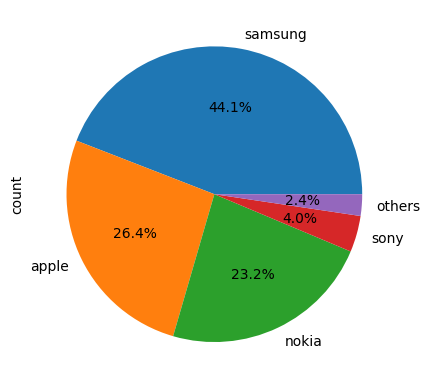

In [40]:
df1['Brand'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.xticks(rotation=45)
plt.show()

In [20]:
df1['Network'].unique()

array(['unlocked', 'restricted', nan, 'unknown'], dtype=object)

In [21]:
def replace_values(value):
    if pd.isna(value):
        return 'unknown'
    else:
        return value  

# Apply the function to the 'Lock Status' column
df1['Network'] = df1['Network'].apply(replace_values)


In [22]:
df1['Screen Size'].mode()

0    6.1
Name: Screen Size, dtype: float64

In [23]:
def replace_values(value):
    if pd.isna(value):
        return 6.1
    else:
        return value  

# Apply the function to the 'Lock Status' column
df1['Screen Size'] = df1['Screen Size'].apply(replace_values)

In [24]:
def replace_values(value):
    if pd.isna(value):
        return 'unlocked'
    else:
        return value  

# Apply the function to the 'Lock Status' column
df1['Lock Status'] = df1['Lock Status'].apply(replace_values)

In [25]:
def replace_values(value):
    if pd.isna(value):
        return 'Without Contract'
    else:
        return value  

# Apply the function to the 'Lock Status' column
df1['Contract'] = df1['Contract'].apply(replace_values)

In [26]:
df1['Model Number'].unique()

array(['SM-A716U', 'SM-A515U', nan, ..., 'SCH-U640', 'A1549',
       'Haven Sch-U320'], dtype=object)

In [27]:
def replace_values(value):
    if 'ios' in str(value).lower():
        return 'ios'
    else:
        return 'android'  

# Apply the function to the 'Lock Status' column
df1['Operating_System'] = df1['Operating_System'].apply(replace_values)

In [28]:
df1['RAM'].unique()

array(['6', '4', '2', '16', 'unknown', '3', '8', '12', '0.278', '15',
       '24', '0.512', '34', '46', 6, '1', '0.048', '0.256', '0.005',
       '0.128', '0.032', '161', '05', '0.06', '0.258', '0.008', '0.004',
       '0.064', '0.016', '005', '5', '0.768', '23', '0.384', '32', '128',
       '0.14', '0.078', '0.25', '003', '42', '0.47800000000000004', '22',
       '64', '20', '0.002', '0.02', '0.001', '0.515', '048', '0.006'],
      dtype=object)

In [29]:
def replace_values(value):
    if 'unknown' in str(value).lower():
        return 6
    else:
        return value
df1['RAM'] = df1['RAM'].apply(replace_values)    

In [30]:
def replace_values(value):
    if 'unknown' in str(value).lower():
        return 64
    if pd.isna(value):
        return 64
    else:
        return value
df1['Storage Capacity'] = df1['Storage Capacity'].apply(replace_values)    

In [31]:
df1.columns

Index(['Title', 'Price', 'Condition', 'Connectivity', 'Model', 'Network',
       'Screen Size', 'Lock Status', 'RAM', 'Contract', 'Model Number',
       'Brand', 'Storage Capacity', 'Camera Resolution', 'Operating_System',
       'amazon_price', 'YEAR'],
      dtype='object')

In [32]:
new_df = df1[['amazon_price', 'Condition', 'Network', 'Screen Size', 'Lock Status', 'RAM', 'Contract', 'Brand', 'Storage Capacity', 'Operating_System', 'Price', 'YEAR']]


In [33]:
new_df.isna().sum()

amazon_price        0
Condition           0
Network             0
Screen Size         0
Lock Status         0
RAM                 0
Contract            0
Brand               0
Storage Capacity    0
Operating_System    0
Price               1
YEAR                0
dtype: int64

In [34]:
new_df=new_df.dropna()

In [35]:
numeric_columns = ['Price', 'amazon_price', 'Screen Size','RAM', 'Storage Capacity', 'YEAR']

new_df[numeric_columns] = new_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Round other numeric columns (except 'YEAR') to a specified number of decimal places
columns_to_round = ['Price', 'amazon_price', 'Screen Size','RAM', 'Storage Capacity']
new_df[columns_to_round] = new_df[columns_to_round].round(4)

# Convert 'YEAR' to integer
new_df['YEAR'] = new_df['YEAR'].fillna(0).astype(int)

In [36]:
new_df['YEAR']

0        2020
3        2020
4        2023
5        2017
6        2021
         ... 
10098    2019
10100    2010
10102    2010
10105    2020
10106    2019
Name: YEAR, Length: 4833, dtype: int64

Text(0.5, 0, 'Year')

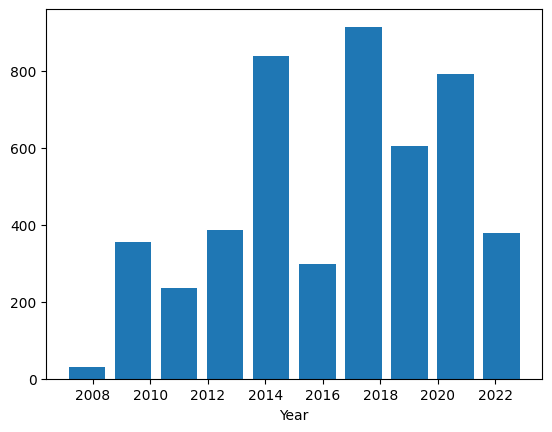

In [37]:
plt.hist(new_df['YEAR'], histtype='bar', rwidth=0.8)
plt.xlabel('Year')

In [38]:
new_df[numeric_columns]

,Price,amazon_price,Screen Size,RAM,Storage Capacity,YEAR
0,201.3000,250.0,6.7,6.0,128.0,2020
3,170.0000,169.0,6.5,4.0,128.0,2020
4,137.6160,400.0,6.6,4.0,64.0,2023
5,73.1878,113.0,4.7,2.0,32.0,2017
6,56.1078,599.0,6.8,4.0,128.0,2021
...,...,...,...,...,...,...
10098,145.0000,250.0,6.1,8.0,128.0,2019
10100,13.4900,29.0,6.1,6.0,64.0,2010
10102,13.4900,29.0,6.1,6.0,2.0,2010
10105,256.5000,250.0,6.9,12.0,128.0,2020


In [471]:
categorical_columns = ['Condition', 'Network', 'Lock Status', 'Contract', 'Brand', 'Operating_System']
new_df = pd.get_dummies(new_df, columns=categorical_columns)

In [472]:
joblib.dump(new_df.columns, 'encoded_columns.joblib')

['encoded_columns.joblib']

In [473]:
features = new_df.drop('Price', axis=1)
label = new_df['Price']

In [474]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [475]:
# Split the data into features and labels
X = new_df.drop('Price', axis=1)
y = new_df['Price']

In [476]:
joblib.dump(X.columns, 'X_columns.joblib')

['X_columns.joblib']

In [478]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [479]:
# Initialize models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [480]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [481]:
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [482]:
joblib.dump(random_forest_model, 'model.joblib')

['model.joblib']

In [483]:
# Make predictions
linear_predictions = linear_model.predict(X_test)
forest_predictions = random_forest_model.predict(X_test)


In [484]:
# Evaluate the models
linear_mse = mean_squared_error(y_test, linear_predictions)
forest_mse = mean_squared_error(y_test, forest_predictions)
linear_r2 = r2_score(y_test, linear_predictions)
forest_r2 = r2_score(y_test, forest_predictions)

In [485]:
print(f"Linear Regression MSE: {linear_mse}, R2: {linear_r2}")
print(f"Random Forest MSE: {forest_mse}, R2: {forest_r2}")

Linear Regression MSE: 14819.83644392462, R2: 0.7291232325718826
Random Forest MSE: 11876.92964152886, R2: 0.7829136427759019


In [486]:
# Check feature importance for the Random Forest model
feature_importance = random_forest_model.feature_importances_

In [487]:
feature_importance

array([7.37120662e-01, 3.64458012e-02, 2.56649760e-02, 2.39446527e-02,
       3.36440688e-02, 2.75855112e-02, 1.72177300e-03, 8.17008856e-06,
       4.22506657e-03, 1.90682255e-03, 1.55790304e-07, 1.60643707e-02,
       4.29390490e-03, 2.31163812e-02, 2.66509735e-02, 1.00928694e-03,
       3.81245154e-03, 8.49666635e-04, 7.45461814e-05, 7.71732228e-06,
       5.11078848e-03, 2.89914184e-03, 8.27699239e-06, 5.04831349e-03,
       2.85038678e-04, 3.88277998e-04, 7.12327017e-03, 3.05638814e-05,
       4.47400434e-03, 6.48536479e-03])

# Model

In [496]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from scipy.stats import skew, norm
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from sklearn.svm import LinearSVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import PowerTransformer

In [498]:
scores = {}
kf = KFold(10, shuffle=True, random_state=42)
lasso = Pipeline([('scaler',RobustScaler()),('lasso',LassoCV(n_jobs=-1))])
elastic = Pipeline([('scaler',RobustScaler()),('elastic',ElasticNetCV(n_jobs=-1))])
rf = RandomForestRegressor(n_jobs=-1)
linsvr = Pipeline([('scaler',RobustScaler()),('svr',LinearSVR())])  #no n_jobs param
ridge = Pipeline([('scaler',RobustScaler()),('ridge',RidgeCV())]) #no n_jobs param
bayridge = Pipeline([('scaler',RobustScaler()),('bayridge',linear_model.BayesianRidge())]) #no n_jobs param
gbr = GradientBoostingRegressor() #no n_jobs param

def models_cv():
    scores = {}
    
    print('lasso')
    cv_lasso = cross_val_score(lasso,X_train,y_train,cv=kf,n_jobs=-1,scoring = 'neg_mean_squared_error')
    print(cv_lasso)
    print(cv_lasso.mean())
    scores['lasso'] = cv_lasso.mean()
    
    print('elastic')
    cv_elastic = cross_val_score(elastic,X_train,y_train,cv=kf,n_jobs=-1,scoring = 'neg_mean_squared_error')
    print(cv_elastic)
    print(cv_elastic.mean())
    scores['elastic'] = cv_elastic.mean()
    
    
    print('rf')
    cv_rf = cross_val_score(rf,X_train,y_train,cv=kf,n_jobs=-1,scoring = 'neg_mean_squared_error')
    print(cv_rf)
    print(cv_rf.mean())
    scores['rf'] = cv_rf.mean()
    
    print('linsvr')
    cv_linsvr = cross_val_score(linsvr,X_train,y_train,cv=kf,n_jobs=-1,scoring = 'neg_mean_squared_error')
    print(cv_linsvr)
    print(cv_linsvr.mean())
    scores['linsvr'] = cv_linsvr.mean()
    
    
    print('ridge')
    cv_ridge = cross_val_score(ridge,X_train,y_train,cv=kf,n_jobs=-1,scoring = 'neg_mean_squared_error')
    print(cv_ridge)
    print(cv_ridge.mean())
    scores['ridge'] = cv_ridge.mean()
    
    print('bayridge')
    cv_bayridge = cross_val_score(bayridge,X_train,y_train,cv=kf,n_jobs=-1,scoring = 'neg_mean_squared_error')
    print(cv_bayridge)
    print(cv_bayridge.mean())
    scores['bayridge'] = cv_bayridge.mean()
    
    print('gbr')
    cv_gbr = cross_val_score(gbr,X_train,y_train,cv=kf,n_jobs=-1,scoring = 'neg_mean_squared_error')
    print(cv_gbr)
    print(cv_gbr.mean())
    scores['gbr'] = cv_gbr.mean()
    
    return scores
print(abs(pd.Series(models_cv())).sort_values(ascending = True))

lasso
[ -18631.80008223  -14258.96643248  -16013.32685833  -15511.99838958
  -12678.11459228  -45978.46560107 -103750.34586271  -22597.26673153
  -19600.29949906  -18680.72258865]
-28770.13066379239
elastic
[ -22010.70986889  -16802.69984661  -17534.16586918  -16802.64413258
  -13533.59767267  -47015.49953219 -109029.293034    -21722.67880906
  -18555.4405639   -19810.56957085]
-30281.729889993334
rf
[-24564.08718914 -20157.5252584   -8884.7970911   -7802.09149717
  -6932.11671109 -46074.94682946 -84180.92805944 -40492.36502764
 -24679.82114897  -5025.33134754]
-26879.401015994586
linsvr
[ -20937.15573377  -14667.25527917  -17427.728565    -16379.50085152
  -13161.78949183  -46610.70901454 -106347.24822717  -21417.65899904
  -18612.38940606  -19828.93087455]
-29539.03664426272
ridge
[ -18610.69328055  -14308.83911655  -16019.89523555  -15463.78023652
  -12684.69069016  -45975.63256252 -103831.81202086  -22096.38108069
  -19618.07256608  -18660.62583709]
-28727.042262657265
bayridge
[ -

/Users/shenglanli/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/shenglanli/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/shenglanli/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/shenglanli/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Use

[-23884.70990071 -11937.84143553  -6837.86317033  -8426.76752063
  -6469.56517833 -39914.27825038 -86380.8125341  -15120.53276625
 -13063.17377201  -6085.01921744]
-21812.05637457097
gbr         21812.056375
rf          26879.401016
ridge       28727.042263
bayridge    28727.242181
lasso       28770.130664
linsvr      29539.036644
elastic     30281.729890
dtype: float64


In [499]:
parameters = {
    'max_depth' : [2, 5, 8, 10],
    'learning_rate' : [0.001, 0.01, 0.1, 0.2],
    'n_estimators' : [100, 300, 500, 1000, 1500],
    'lambda_l1' : [0.0001, 0.001, 0.01],
    'lambda_l2' : [0, 0.0001, 0.001, 0.01],
    'feature_fraction' : [0.4, 0.6, 0.8],
    'min_child_samples' : [5, 10, 20, 25]
}

In [500]:
param_grid =  {'n_estimators': [100,500],
                'max_depth': [10,20],
                'min_samples_leaf': [2,3],
                'min_samples_split': [2,3]}

In [501]:
parameters = {'learning_rate': [0.15],'colsample_bytree': [0.5],
 'max_depth' : [3],'n_estimators':[1000]
}

In [502]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'depth' : [6,8,10,12],
              'learning_rate' : [0.01, 0.1,1],
              'logging_level':['Silent']
              }

In [505]:
best_elastic = elastic
best_lasso = lasso
best_ridge = ridge
best_bayridge = bayridge
best_gbr = gbr
best_rf = rf
best_linsvr = linsvr

In [518]:
kf2 = KFold(15, shuffle=True, random_state=42)
stack = StackingRegressor(
    estimators=[('ridge',best_ridge),('lasso',best_lasso), 
                ('bayridge',bayridge),('elastic',best_elastic),('rf',best_rf), 
                ('gbr',best_gbr),('linsvr',best_linsvr)], 
    cv=kf2, n_jobs=-1,
     final_estimator=best_elastic)
rmse= -cross_val_score(stack, X_train, y_train, scoring="neg_mean_squared_error",n_jobs=-1,cv=kf)
print('StackingRegressor Scores')
print(rmse)
print(rmse.mean())
print(rmse.std())

/Users/shenglanli/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/shenglanli/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/shenglanli/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/shenglanli/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Use

StackingRegressor Scores
[18499.80074256 12331.90710161  8294.42651884  8469.71646195
  7715.72675299 40538.01116386 90097.70346623 17606.90183285
 14206.75019242  9417.54939864]
22717.849363196096
24279.26957263235


In [522]:
stack.fit(X_train,y_train)

/Users/shenglanli/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/shenglanli/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/shenglanli/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/shenglanli/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Use

StackingRegressor(cv=KFold(n_splits=15, random_state=42, shuffle=True),
                  estimators=[('ridge',
                               Pipeline(steps=[('scaler', RobustScaler()),
                                               ('ridge', RidgeCV())])),
                              ('lasso',
                               Pipeline(steps=[('scaler', RobustScaler()),
                                               ('lasso', LassoCV(n_jobs=-1))])),
                              ('bayridge',
                               Pipeline(steps=[('scaler', RobustScaler()),
                                               ('bayridge', BayesianRidge())])),
                              ('elastic',
                               Pipeline(steps=[('scaler', RobustScaler()),
                                               ('elastic',
                                                ElasticNetCV(n_jobs=-1))])),
                              ('rf', RandomForestRegressor(n_jobs=-1)),
                              ('gbr', GradientBoostingRegressor()),
                              ('linsvr',
                               Pipeline(steps=[('scaler', RobustScaler()),
                                               ('svr', LinearSVR())]))],
                  final_estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                                  ('elastic',
                                                   ElasticNetCV(n_jobs=-1))]),
                  n_jobs=-1)

In [519]:
def blended_model(a,b,c,d,e,f):
    best_rf.fit(X_train,y_train)
    best_ridge.fit(X_train,y_train)
    best_lasso.fit(X_train,y_train)
    best_elastic.fit(X_train,y_train)
    best_bayridge.fit(X_train,y_train)
    stack.fit(X_train,y_train)
    #best_lgbm.fit(X_train,y)
    #best_gbr.fit(X_train,y)
    return ((a*best_rf.predict(X_test))+(b*best_ridge.predict(X_test))+(c*best_lasso.predict(X_test))+(d*best_elastic.predict(X_test)) + (e*best_bayridge.predict(X_test)) + (f*stack.predict(X_test)))



In [520]:
predictions = blended_model(0,0,0,0,0,1)

/Users/shenglanli/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/shenglanli/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/shenglanli/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/shenglanli/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Use

In [521]:
r2_score(y_test, predictions)

0.8045748518781155

# APP

In [488]:
import joblib
joblib.dump(random_forest_model, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [523]:
joblib.dump(stack, 'stack_model.joblib')

['stack_model.joblib']

In [386]:
joblib.dump(new_df.columns, 'encoded_columns.joblib')

['encoded_columns.joblib']

In [387]:
import streamlit as st

In [489]:
model = joblib.load('model.joblib')

In [490]:
def process_input_data(input_data):
    # Load the column names of the preprocessed DataFrame
    encoded_columns = joblib.load('X_columns.joblib')

    # Convert the input data (which could be a dictionary) into a DataFrame
    input_df = pd.DataFrame([input_data])

    # Initialize a DataFrame with zeros for all columns saved in 'encoded_columns'
    # This ensures that the new DataFrame has the same structure as the training data
    processed_df = pd.DataFrame(columns=encoded_columns)
    processed_df.loc[0] = 0

    # Fill in the values for the columns present in the input data
    for col in input_df.columns:
        # If the column is numeric, just copy the value
        if col in processed_df.columns:
            processed_df[col] = input_df[col].values

        # If the column is categorical, set the corresponding one-hot encoded column to 1
        elif any(col in s for s in processed_df.columns):
            # Find the matching column name and set it to 1
            matching_column = [s for s in processed_df.columns if col in s][0]
            processed_df[matching_column] = 1

    return processed_df


In [492]:
df1['Contract'].unique()

array(['Without Contract', 'unknown', 'Prepaid', 'With Contract',
       'Pay as go'], dtype=object)

In [ ]:
st.title('Used Mobile Phone Price Calculator')

# Creating input widgets for each feature
amazon_price = st.number_input('Price for Brand-new one', value = 699.00,min_value=0.0, format='%f')
Screen_Size = st.number_input('Screen Size (inches)', value = 6.0,min_value=0.0, format='%f')
RAM = st.number_input('RAM (GB)',value = 6, min_value=0, format='%d')
Storage_Capacity = st.number_input('Storage Capacity (GB)', value=64,min_value=0, format='%d')
YEAR = st.number_input('Year when the device model was released', min_value=2009, max_value=2023, step=1)
Condition = st.selectbox('Condition', options=['brand-new', 'open box_excellent', 'refurbished', 'used',
       'parts or not working', 'original box', 'unknown'])
Network = st.selectbox('Network', options=['unlocked', 'restricted', 'unknown'])
Lock_Status = st.selectbox('Lock Status', options=['unlocked', 'locked', 'unknown'])
Contract = st.selectbox('Contract', options=['Without Contract', 'unknown', 'Prepaid', 'With Contract',
       'Pay as go'])
Brand = st.selectbox('Brand', options=['samsung', 'apple', 'others', 'nokia', 'sony'])
Operating_system = st.selectbox('Operating System', options=['android', 'ios'])

# When the user clicks the predict button, process the input and make a prediction
if st.button('Press to Predict'):
    # Create a dictionary from the inputs
    input_data = {
        'amazon_price': amazon_price,
        'Screen Size':Screen_Size
        'RAM': RAM,
        'Storage Capacity': Storage_Capacity,
        'YEAR': YEAR,
        # Append '_<category>' to the categorical inputs to match the One-Hot Encoded format
        f'Condition_{Condition}': 1,
        f'Network_{Network}': 1,
        f'Lock Status_{Lock_Status}': 1,
        f'Contract_{Contract}': 1,
        f'Brand_{Brand}': 1,
        f'Operating_System_{Operating_system}': 1
    }

    # Process the input data to match the trained model's format
    processed_data = process_input_data(input_data)

    # Make a prediction
    prediction = model.predict(processed_data)

    # Display the prediction
    #st.write(f"Predicted Amazon Price: ${prediction[0]:.2f}")
    st.markdown(f"<div class='big-font'>Estimated Price: ${prediction[0]:.2f}</div>", unsafe_allow_html=True)